In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten,Reshape
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam



In [29]:
IMG_ROW = 28
IMG_COL = 28
CHANNELS = 1

IMG_SHAPE =(IMG_ROW,IMG_COL,CHANNELS)

Z_DIM =100 # 噪声向量的大小 用作生成器的输入



In [30]:
#构建生成器
def build_generator(img_shape,z_dim):
    model =Sequential()
    model.add(Dense(128,input_dim =z_dim))
    model.add (LeakyReLU(alpha=0.01))
    model.add(Dense(28*28*1,activation='tanh'))
    model.add(Reshape(img_shape))
    return model

In [31]:
#构建鉴别器

def build_discriminator(img_shape):
    model = Sequential()
    model.add(Flatten(input_shape =img_shape))
    model.add(Dense(128))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(1,activation='sigmoid'))
    return model

In [32]:
# 构建GAN

def build_gan(generator,discriminator):
    model = Sequential()
    model.add(generator) 
    model.add(discriminator)
    
    return model

discriminator =build_discriminator(IMG_SHAPE)
discriminator.compile(loss='binary_crossentropy',
                      optimizer =Adam(),
                      metrics =['accuracy']
                      ) 

generator = build_generator(IMG_SHAPE,Z_DIM)
discriminator.trainable =False

gan =build_gan(generator,discriminator)
gan.compile(loss='binary_crossentropy',
            optimizer =Adam()
            )



In [41]:
# 显示图片

def sample_image(generator,img_grid_rows=4,img_grid_cols=4):
    z =np.random.normal(0,1,(img_grid_rows*img_grid_cols,Z_DIM))
    gen_imgs = generator.predict(z)
    gen_imgs = 0.5*gen_imgs+0.5 # 将图像像素值缩放值[0,1]
    
    fig,axs =plt.subplots(img_grid_rows,img_grid_cols,figsize=(5,5),sharex=True,sharey=True)
    
    count =0
    for i in range(img_grid_rows):
        for j in range(img_grid_cols):
            axs[i,j] .imshow(gen_imgs[count,:,:,0],cmap='gray')
            axs[i,j].axis('off')
            count+=1            
            
    plt.show()
            

2/2 [==============================] - 0s 4ms/step
500 0.0041025548707693815 100.0 5.139103412628174
1/1 [==============================] - 0s 29ms/step


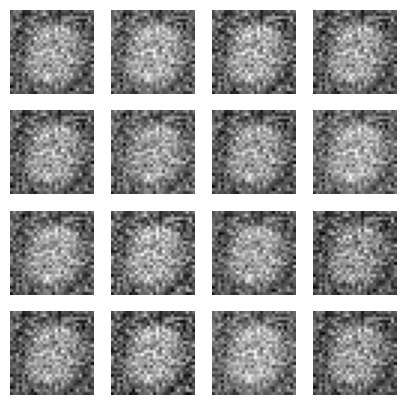

2/2 [==============================] - 0s 5ms/step
1000 0.13713723048567772 96.09375 3.378941059112549
1/1 [==============================] - 0s 26ms/step


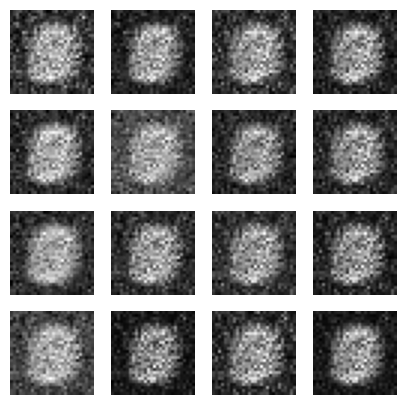

2/2 [==============================] - 0s 3ms/step
1500 0.06673805974423885 98.4375 3.563023805618286
1/1 [==============================] - 0s 32ms/step


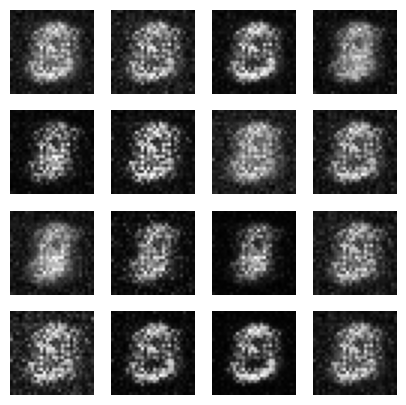

2/2 [==============================] - 0s 3ms/step
2000 0.09556180983781815 96.875 5.230310440063477
1/1 [==============================] - 0s 27ms/step


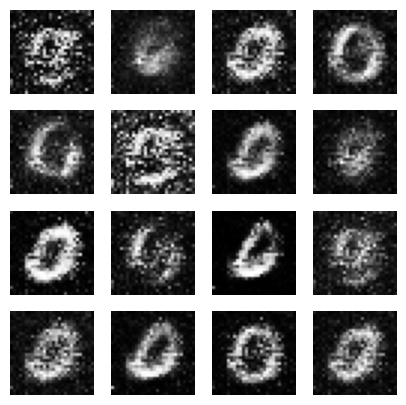

2/2 [==============================] - 0s 3ms/step
2500 0.24443162232637405 91.40625 4.9135541915893555
1/1 [==============================] - 0s 25ms/step


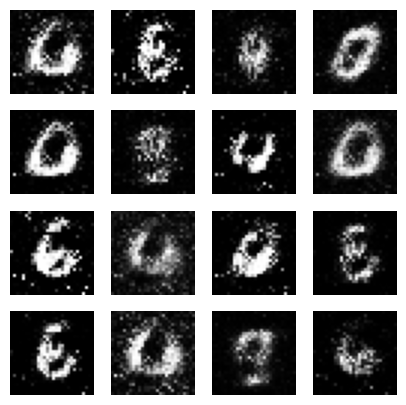

2/2 [==============================] - 0s 4ms/step
3000 0.42202889919281006 85.15625 2.7418859004974365
1/1 [==============================] - 0s 28ms/step


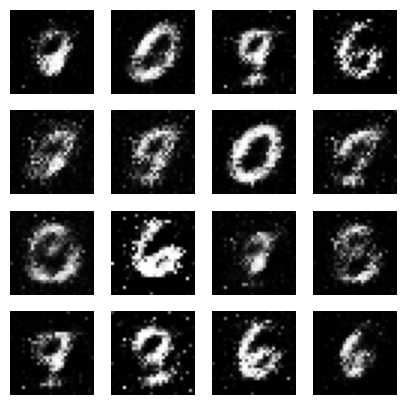

2/2 [==============================] - 0s 5ms/step
3500 0.1960947960615158 91.40625 3.802746057510376
1/1 [==============================] - 0s 28ms/step


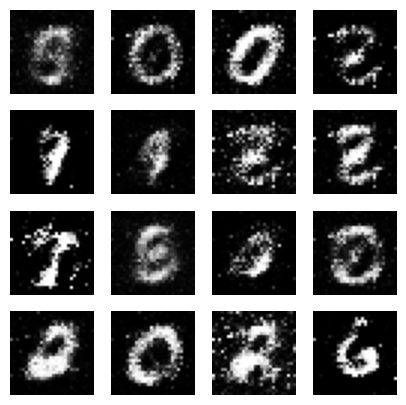

2/2 [==============================] - 0s 5ms/step
4000 0.2803685590624809 84.375 3.493072509765625
1/1 [==============================] - 0s 29ms/step


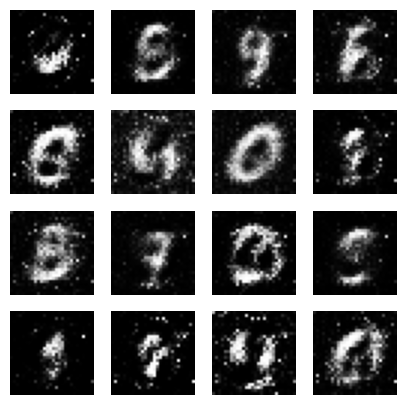

2/2 [==============================] - 0s 6ms/step
4500 0.18772882223129272 91.40625 5.312814235687256
1/1 [==============================] - 0s 35ms/step


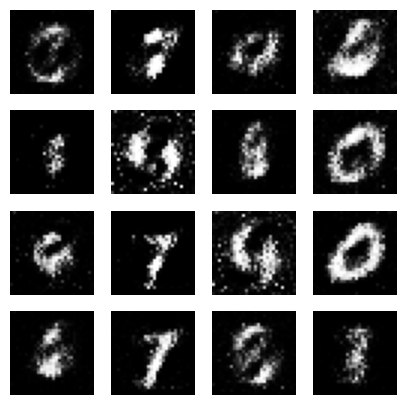

2/2 [==============================] - 0s 5ms/step
5000 0.2947898656129837 85.15625 4.154718399047852
1/1 [==============================] - 0s 25ms/step


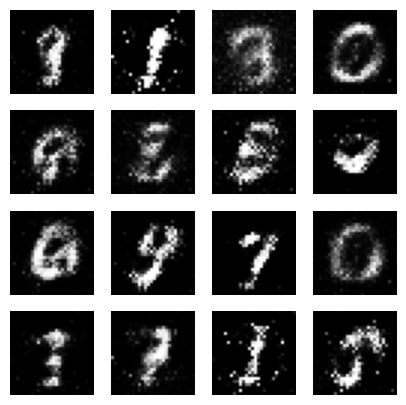

In [43]:
losses = []
accuracies = []
iteration_checkpoints = []
EPOCHS =5000
BATCH_SIZE =64
SAMPLE_INTERVAL=500

(X_train,_),(_,_) =mnist.load_data()
X_train = X_train/127.5-1.0  #这样的预处理对于某些类型的神经网络（尤其是那些使用 tanh 激活函数作为输出层的网络）是有利的，因为 tanh 函数的输出范围也是 [-1, 1]
X_train = np.expand_dims(X_train,axis=3) #np.expand_dims 在第 4 个轴（索引为 3）上扩展了维度，所以新的形状将是 (60000, 28, 28, 1)
real = np.ones((BATCH_SIZE,1))
fake = np.zeros((BATCH_SIZE,1))

for epoch in range (EPOCHS):
    idx = np.random.randint(0,X_train.shape[0],BATCH_SIZE)#使用 np.random.randint 函数随机选择 BATCH_SIZE 数量的索引，这些索引对应于 X_train 中的图像
    imgs = X_train[idx]
    z = np.random.normal(0,1,(BATCH_SIZE,Z_DIM))#创建一批随机噪声向量 z，作为生成器的输入。这里的 100 表示每个噪声向量的维度
    gen_imgs = generator.predict(z)
    d_loss_real = discriminator.train_on_batch(imgs,real)
    d_loss_fake = discriminator.train_on_batch(gen_imgs,fake)
    d_loss,accuracy =0.5* np.add(d_loss_real,d_loss_fake)
    
    z = np.random.normal(0,1,(BATCH_SIZE,Z_DIM)) 
    gen_imgs =generator.predict(z)
    g_loss = gan.train_on_batch(z,real)
    
    iter = epoch+1
    if iter%SAMPLE_INTERVAL == 0 :
        losses.append((d_loss,g_loss))
        accuracies.append(accuracy)
        iteration_checkpoints.append(iter)
        print(iter,d_loss,accuracy*100,g_loss)
        sample_image(generator)
